In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xlrd

# define classes

In [2]:
class Consumption:
    def __init__(self, high_consumption, low_consumption):
        self.high_consumption = high_consumption
        self.low_consumption = low_consumption
        self.total_consumption = high_consumption + low_consumption


class Energy_provider:
    def __init__(self, name, surcharge):
        self.name = name
        self.surcharge = surcharge


class Energy_provider_dvotarifno(Energy_provider):
    def __init__(self, name, surcharge, high_price, low_price):
        super().__init__(name, surcharge)
        self.name = "DT " + self.name
        self.high_price = high_price
        self.low_price = low_price

    def calculate_cost(self, consumption: Consumption):
        return (
            self.high_price * consumption.high_consumption
            + self.low_price * consumption.low_consumption
            + self.surcharge * 12
        )


class Energy_provider_enotarifno(Energy_provider):
    def __init__(self, name, surcharge, price):
        super().__init__(name, surcharge)
        self.name = "ET " + self.name
        self.price = price

    def calculate_cost(self, consumption: Consumption):
        return self.price * consumption.total_consumption + self.surcharge * 12

# import market data

In [3]:
workbook = xlrd.open_workbook("cene.xls")

In [4]:
sheet_enotarifno = workbook.sheet_by_name("Električna energija Enotarifno")
sheet_dvotarifno = workbook.sheet_by_name("Električna energija Dvotarifno")

energy_providers = []

for sheet_idx, sheet in enumerate((sheet_enotarifno, sheet_dvotarifno)):
    for i in range(2, 100):
        name = sheet.cell_value(i, 0) + " " + sheet.cell_value(i, 1)
        if name == "" or name == " ":
            break
        if sheet_idx == 0:
            et = float(sheet.cell_value(i, 2))
            surcharge_string = sheet.cell_value(i, 3).split(" ")
        else:
            vt = float(sheet.cell_value(i, 2))
            mt = float(sheet.cell_value(i, 3))
            surcharge_string = sheet.cell_value(i, 4).split(" ")
        surcharge = 0
        surcharge_string_numbers = []
        for element in surcharge_string:
            if surcharge > 0:
                break
            try:
                surcharge = float(element.replace(",", "."))
                surcharge_string_numbers.append(surcharge)
            except:
                pass
        if len(surcharge_string_numbers) > 0:
            surcharge = np.max(surcharge_string_numbers)
        if sheet_idx == 0:
            energy_providers.append(
                Energy_provider_enotarifno(name=name, price=et, surcharge=surcharge)
            )
        else:
            energy_providers.append(
                Energy_provider_dvotarifno(
                    name=name, high_price=vt, low_price=mt, surcharge=surcharge
                )
            )

# define functions

In [5]:
def calculate_costs(prices: Energy_provider, consumption: Consumption):
    costs = [[(x.calculate_cost(consumption)), x.name] for x in prices]
    return costs


def plot_costs(costs):
    y = np.array([x[0] for x in costs])
    sort = np.argsort(y)
    y = y[sort]
    labels = np.array([x[1] for x in costs], dtype=str)[sort]
    x = np.arange(y.size)
    f, ax = plt.subplots(dpi=150)

    ax.bar(x, y)
    plt.xticks(x, labels, rotation=90)
    ax.set_ylabel("cost (EUR)")

# set yearly consumption

In [6]:
home_consumption = Consumption(4500, 3500)  # high tarif, low tarif

# plot

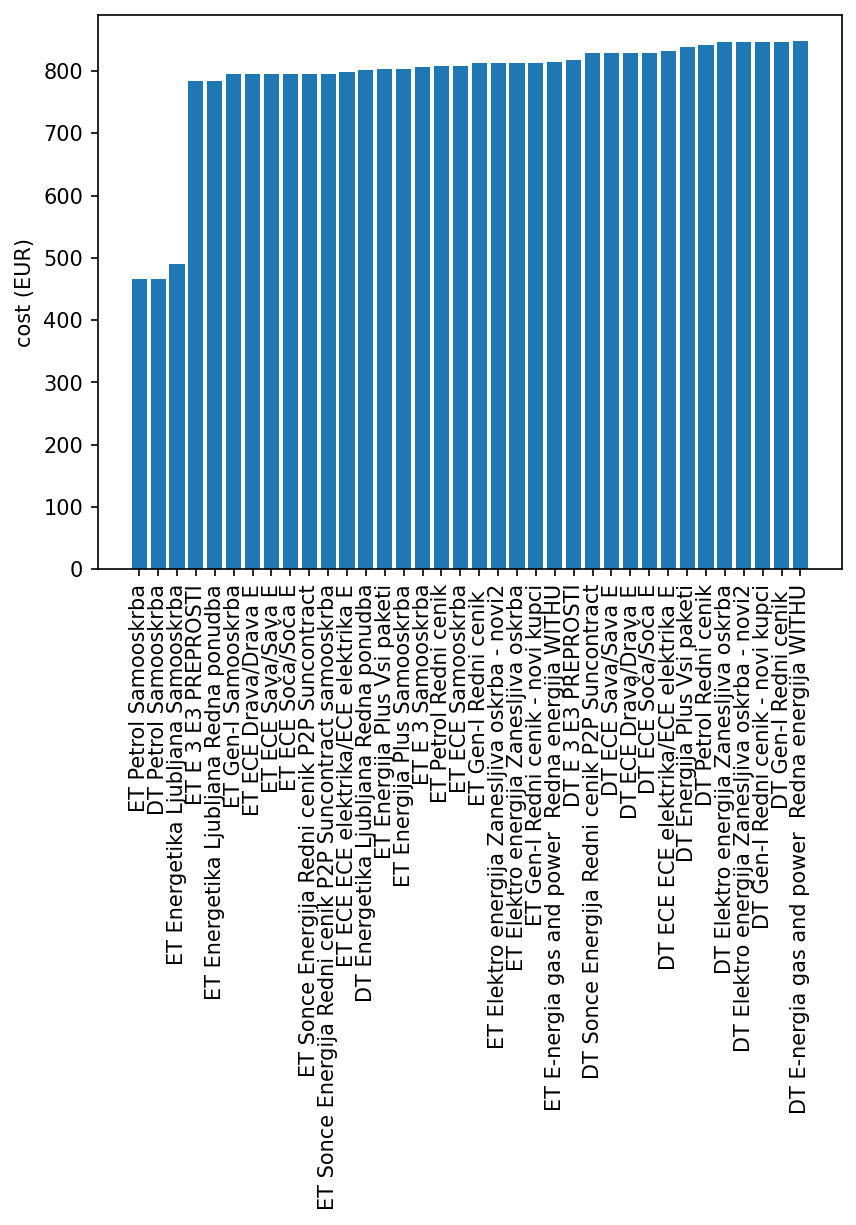

In [7]:
costs = calculate_costs(energy_providers, home_consumption)

plot_costs(costs)

# obsolete

In [8]:
class EnergyProviderOld:
    def __init__(self, name, high_price, low_price, surcharge):
        self.name = name
        self.high_price = high_price
        self.low_price = low_price
        self.surcharge = surcharge

In [9]:
ratio = np.linspace(0, 1, 10)
prices = [
    ("adriaplin", 0.15800, 0.09950),
    ("e3napredni", 0.10151, 0.01009),
    ("e3zeleni", 0.08341, 0.04978),
    ("e3preprosti", 0.08923, 0.05499),
    ("eon zvesti", 0.07152, 0.04883),
    ("ece top", 0.06999, 0.05169),
    ("ece skupaj", 0.06499, 0.04599),
    ("ece sava", 0.08715, 0.05895),
    ("energija plus", 0.07299, 0.04239),
    ("ep eu", 0.06090, 0.04330),
    ("geni", 0.06490, 0.03599),
    ("ener lj", 0.06645, 0.04345),
]

In [10]:
def calc(ratio, price_low, price_high):
    return ratio * price_low + (1 - ratio) * price_high

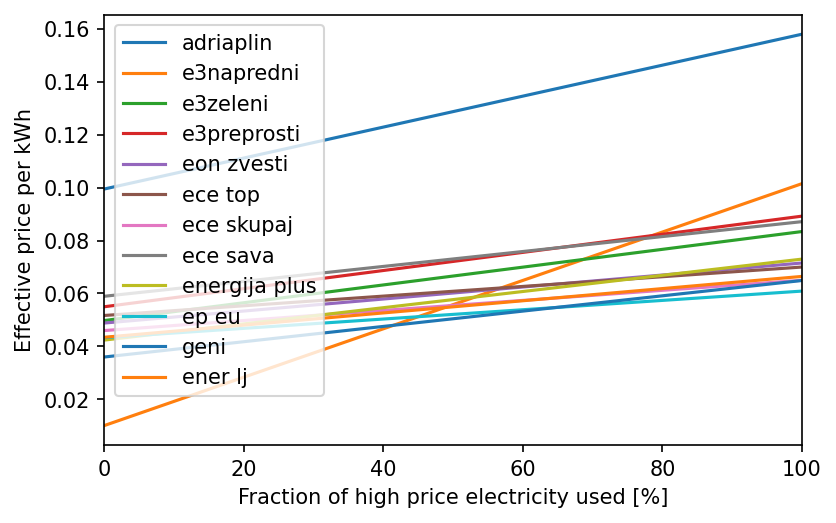

In [11]:
f, ax = plt.subplots(figsize=(6, 6 / 1.61), dpi=150)
for item in prices:
    plt.plot(ratio * 100, calc(ratio, item[1], item[2]), label=item[0])
ax.legend(loc="best")
ax.set_ylabel("Effective price per kWh")
ax.set_xlabel("Fraction of high price electricity used [%]")
ax.set_xlim(0, 100);

In [12]:
prices = [
    EnergyProviderOld("adriaplin", 0.15800, 0.09950, 0),
    EnergyProviderOld("e3napredni", 0.10151, 0.01009, 0),
    EnergyProviderOld("e3zeleni", 0.08341, 0.04978, 0),
    EnergyProviderOld("e3preprosti", 0.08923, 0.05499, 0),
    EnergyProviderOld("eon zvesti", 0.07152, 0.04883, 0),
    EnergyProviderOld("ece top", 0.06999, 0.05169, 1.0),
    EnergyProviderOld("ece skupaj", 0.06499, 0.04599, 1.0),
    EnergyProviderOld("ece sava", 0.08715, 0.05895, 0.89),
    EnergyProviderOld("energija plus", 0.07299, 0.04239, 0),
    EnergyProviderOld("ep eu", 0.06090, 0.04330, 0),
    EnergyProviderOld("geni", 0.06490, 0.03599, 1),
    EnergyProviderOld("ener lj", 0.06645, 0.04345, 0),
]